# Impact of Test Preparation Course on Student Performance

In [3]:
# Data Manipulation and Analysis
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing

In [4]:
data = pd.read_csv("study_performance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Check for duplicate entries
data.duplicated().sum()

0

In [9]:
# Check for missing value (NA)
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

The dataset is free of duplicate entriies and missing value.

In [5]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data.shape

(1000, 8)

After data processing, there are 1000 rows and 8 of columns in this dataset.

In [7]:
# Create a new column - total_score
df_processed = data.copy()
df_processed['total_scores'] = df_processed['math_score'] + df_processed['reading_score'] + df_processed['writing_score']

In [8]:
# Creaate a new column - pass_fail
df_processed['pass_fail'] = df_processed['total_scores'].apply(lambda x: 'pass' if x >= 180 else 'fail')

In [302]:
df_processed.describe()

,math_score,reading_score,writing_score,total_scores
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [12]:
#df_processed.to_csv('students_processed.csv')

# Hypothesis Test

Null Hypothesis (H0): 
Students who participate in the test preparation course achieve no higher on the tests than those who do not participate

Alernative Hypothesis (H1): Students who participate in the test preparation course achieve higher on the tests than those who do not participate

Sample Size:

In [107]:
participations_counts = df_processed['test_preparation_course'].value_counts()
#print(participations_counts)
participations_table = pd.DataFrame(participations_counts).reset_index()
participations_table.columns = ['Status', 'Count']
print(participations_table)

      Status  Count
0       none    642
1  completed    358


Text(0.5, 1.0, 'Distribution of Students on Test Preparation Course')

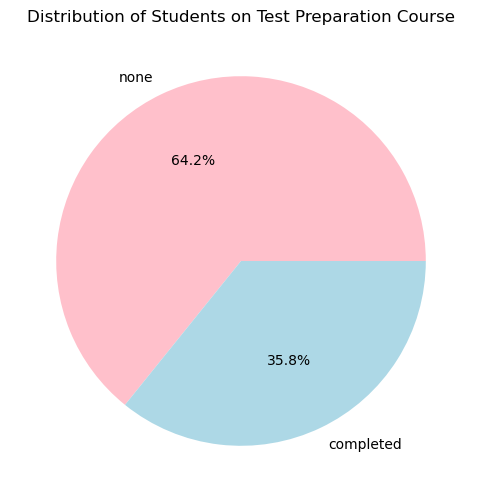

In [304]:
plt.figure(figsize=(6, 6)) 
plt.pie(
    participations_counts,
    labels=participations_counts.index,
    autopct="%1.1f%%",
    colors=['pink', 'lightblue'],
)
plt.title('Distribution of Students on Test Preparation Course')

In [9]:
df_processed['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [10]:
df_processed['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Observation:
   - The study included 1000 students, with 642 participating in the test preparation course and 358 not participating.

# Data Exploration(EDA)

# Evaulating the Effectiveness of Test Preparation Course

# 1. Overall Performance

In [110]:
from scipy import stats

pre_course = df_processed['test_preparation_course']
total_scores = df_processed['total_scores']

t_statistic, p_value = stats.ttest_ind(total_scores[pre_course == "completed"],
                                       total_scores[pre_course == "none"], 
                                       equal_var = False)

if p_value < 0.05:
  print("We reject the null hypothesis since the p-value is less than the significance level(0.05).")
else:
  print("We fail to reject the null hypothesis.")

We reject the null hypothesis since the p-value is less than the significance level(0.05).


Observation:
1. Overall Positive Impact: There is statistically significant evidence to reject the null hypothesis nd accept the alternative hypothesis, students who participate in the test preparation course achieve higher score on the tests. Taking the test preparation course has a positive impact on students' overall performance.

# 2. Subject-Specific Impact

(a) Math:

test_preparation_course
completed    69.695531
none         64.077882
Name: math_score, dtype: float64
The difference between completed students and those who don't is 5.617649106319291

Students who completed the preparation course had a higher average score in math compared to those who don't. 


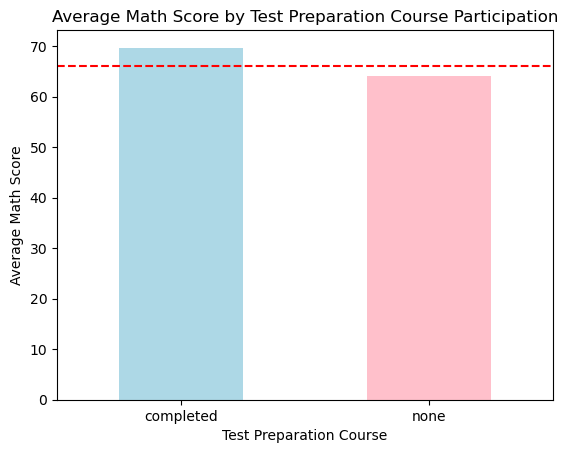

In [236]:
math_score_mean = df_processed['math_score'].describe().loc['mean']
participation_math = df_processed.groupby('test_preparation_course')['math_score'].mean()

cal_math = participation_math.reset_index(name = 'count')
score_difference_math =  cal_math.iloc[0]['count'] - cal_math.iloc[1]['count']
print("The difference between completed students and those who don't is", score_difference_math)

if score_difference_math > 0:
    print("\nStudents who completed the preparation course had a higher average score in math compared to those who don't. ")
else:
    print("\nA potentially negative effect of the course on math's average score")

participation_math.plot(kind = 'bar',
                       color = ['lightblue', 'pink'])
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Math Score")
plt.title("Average Math Score by Test Preparation Course Participation")
plt.xticks(rotation = 360) 

plt.axhline(math_score_mean, 
            color = 'red', 
            linestyle = '--')

(b) Reading:

test_preparation_course
completed    73.893855
none         66.534268
Name: reading_score, dtype: float64
The difference between completed students and those who don't is 7.359586835830754

Students who completed the preparation course had a higher average score in reading compared to those who don't. 


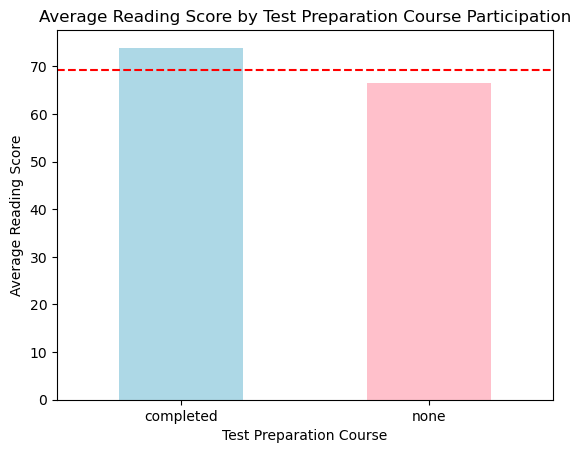

In [237]:
reading_score_mean = df_processed['reading_score'].describe().loc['mean']
print(participation_reading)
participation_reading = df_processed.groupby('test_preparation_course')['reading_score'].mean()

cal_reading = participation_reading.reset_index(name = 'count')
score_difference_reading =  cal_reading.iloc[0]['count'] - cal_reading.iloc[1]['count']
print("The difference between completed students and those who don't is", score_difference_reading)

if score_difference_reading > 0:
    print("\nStudents who completed the preparation course had a higher average score in reading compared to those who don't. ")
else:
    print("\nA potentially negative effect of the course on reading's average score.")

participation_reading.plot(kind = 'bar',
                           color = ['lightblue', 'pink'])

plt.xlabel("Test Preparation Course")
plt.ylabel("Average Reading Score")
plt.title("Average Reading Score by Test Preparation Course Participation")
plt.xticks(rotation = 360) 

plt.axhline(reading_score_mean, 
            color = 'red', 
            linestyle = '--')

(c) Writing: 

The difference between completed students and those who don't is 9.914321516211558

Students who completed the preparation course had a higher average score in writing compared to those who don't. 


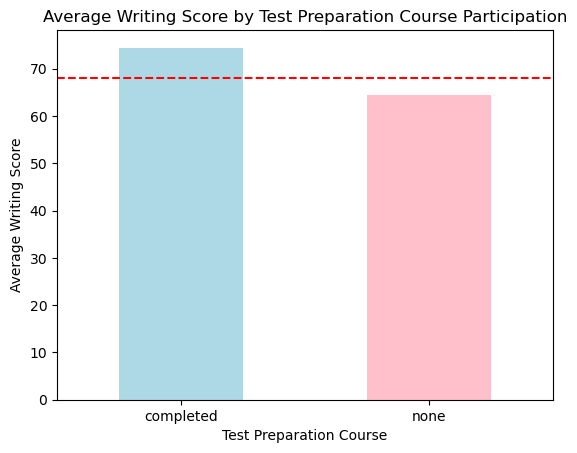

In [69]:
writing_score_mean = df_processed['writing_score'].describe().loc['mean']
#print(writing_score_mean)
participation_writing = df_processed.groupby('test_preparation_course')['writing_score'].mean()
#print(participation_writing)
cal_writing = participation_writing.reset_index(name = 'count')
score_difference_writing =  cal_writing.iloc[0]['count'] - cal_writing.iloc[1]['count']
print("The difference between completed students and those who don't is", score_difference_writing)

if score_difference_writing > 0:
    print("\nStudents who completed the preparation course had a higher average score in writing compared to those who don't. ")
else:
    print("\nA potentially negative effect of the course on writing's average score.")

participation_writing.plot(kind = 'bar',
                           color = ['lightblue', 'pink'])

plt.xlabel("Test Preparation Course")
plt.ylabel("Average Writing Score")
plt.title("Average Writing Score by Test Preparation Course Participation")
plt.xticks(rotation = 360) 

plt.axhline(writing_score_mean, 
            color = 'red', 
            linestyle = '--')

Observations:
1. Higher Scores with Participation: The average score appears higher for students who participated in the preparation course for each test.
2. Writing with Highest Difference: The average scores between participation groups indicate that the test preparation course has had the greatest impact on the writing test.

# 3. Pass Rate

In [86]:
df_processed['pass_fail'].value_counts()

pass_fail
pass    715
fail    285
Name: count, dtype: int64

pass_fail                fail  pass
test_preparation_course            
completed                  60   298
none                      225   417


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400'),
  Text(450.0, 0, '450')])

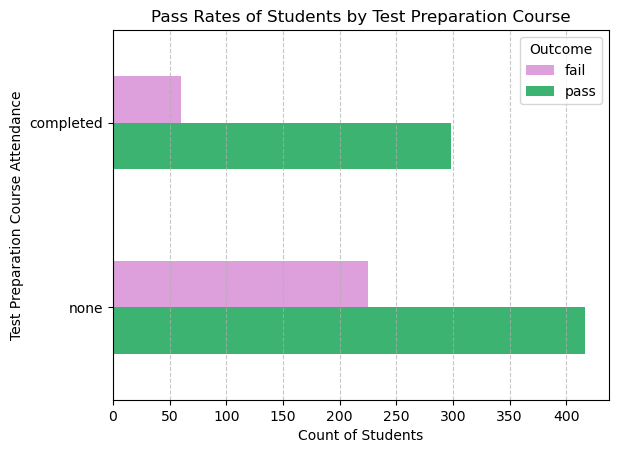

In [265]:
pass_rate = df_processed.groupby('test_preparation_course')['pass_fail'].value_counts().unstack()
print(pass_rate)

pass_rate.plot(
    kind = 'barh',
    color = ['plum', 'mediumseagreen'])


plt.xlabel('Count of Students')
plt.ylabel('Test Preparation Course Attendance')
plt.title('Pass Rates of Students by Test Preparation Course')

### Arrange bars from highest to lowest 
plt.gca().invert_yaxis()

plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.legend(title = 'Outcome')
plt.xticks(rotation = 360) 

Observations:
1. Higher Pass Rate: Students who completed the course have a higher pass rate (298/358 = 83%) compared to those who did not (298/642 = 46%). This suggests that the course is helping students achieve the passing score more frequently.

While the primary focus of this project is to examine the effectiveness of the test preparation course in improving student performance, the potential influence of two additional factors - the lunch status and parental education level also have been investigated. This exploration aims to understand if these factors have an independent impact on student achievement, alongside the impact of the test preparation course.


## Parental Education's Impact on Student Pass Rates

In [113]:
df_processed['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [213]:
df_processed.groupby(['parental_level_of_education', 'test_preparation_course', 'pass_fail']).size().unstack().reset_index()
pass_percet_df['pass_percentage'] = pass_percet_df['pass'] / (pass_percet_df['pass'] + pass_percet_df['fail'])
pass_percet_df.sort_values(by = ['pass_percentage'])

pass_fail,parental_level_of_education,test_preparation_course,fail,pass,pass_percentage
11,some high school,none,45,57,0.558824
5,high school,none,61,79,0.564286
1,associate's degree,none,49,91,0.650000
9,some college,none,46,103,0.691275
4,high school,completed,15,41,0.732143
10,some high school,completed,19,58,0.753247
3,bachelor's degree,none,16,56,0.777778
7,master's degree,none,8,31,0.794872
0,associate's degree,completed,10,72,0.878049
8,some college,completed,9,68,0.883117


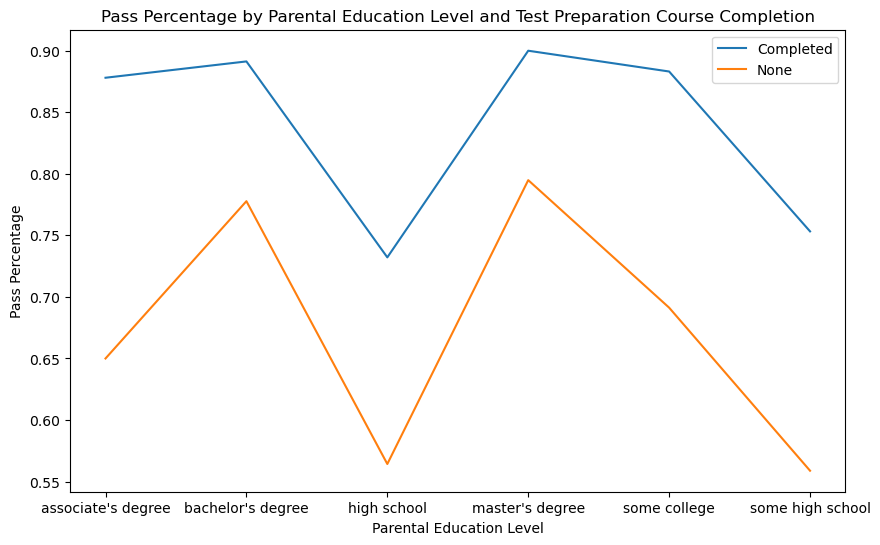

In [210]:
pass_percet_df = df_processed.groupby(['parental_level_of_education', 'test_preparation_course', 'pass_fail']).size().unstack().reset_index()

pass_percet_df['pass_percentage'] = pass_percet_df['pass'] / (pass_percet_df['fail'] + pass_percet_df['pass'])
pass_percet_df.sort_values(by = ['pass_percentage'])

completed_data = pass_percet_df[pass_percet_df['test_preparation_course'] == 'completed']
none_data = pass_percet_df[pass_percet_df['test_preparation_course'] == 'none']

x_completed = completed_data['parental_level_of_education']
y_completed = completed_data['pass_percentage']
x_none = none_data['parental_level_of_education']
y_none = none_data['pass_percentage']

plt.figure(figsize=(10, 6))
plt.plot(x_completed, y_completed, label = 'Completed')
plt.plot(x_none, y_none, label = 'None')
plt.xlabel('Parental Education Level')
plt.ylabel('Pass Percentage')
plt.title('Pass Percentage by Parental Education Level and Test Preparation Course Completion')

plt.legend()

Observations:
1. Parental education level has a strong impact on student's pass rate even though they completed the preparation course or not
2. Students with parents holding master's degrees have the highest pass rate, regardless of their participation in the preparation course

# Lunch Status Impact on Student Pass Rates

(array([0, 1]), [Text(0, 0, 'free/reduced'), Text(1, 0, 'standard')])

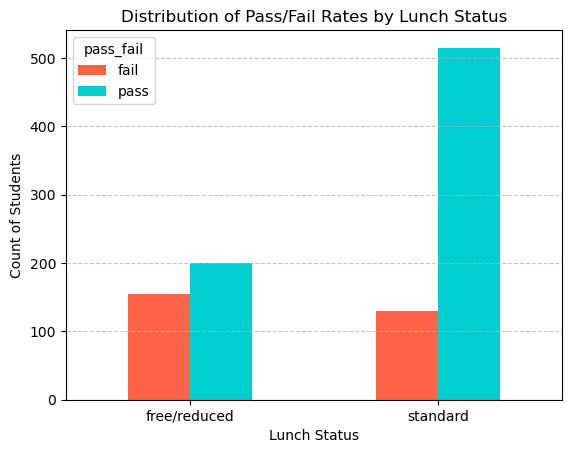

In [228]:
lunch_df = df_processed.groupby('lunch')['pass_fail'].value_counts().unstack()

lunch_df.plot(
    kind = 'bar',
    color = ['tomato', 'darkturquoise'])

plt.xlabel('Lunch Status')
plt.ylabel('Count of Students')
plt.title('Distribution of Pass/Fail Rates by Lunch Status')


plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.xticks(rotation = 360)

In [235]:
descending_scores_df = df_processed.sort_values(by = ['total_scores'], ascending=(False))
descending_scores_df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores,pass_fail
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,pass
458,female,group E,bachelor's degree,standard,none,100,100,100,300,pass
962,female,group E,associate's degree,standard,none,100,100,100,300,pass
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,pass
179,female,group D,some high school,standard,completed,97,100,100,297,pass
712,female,group D,some college,standard,none,98,100,99,297,pass
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,pass
625,male,group D,some college,standard,completed,100,97,99,296,pass
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,pass
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,pass


Observations:
1. There is a difference in pass rates between students who have lunch regularly and those who don't. Students who have lunch regularly have a higher pass rate (80%) compared to those who don't.
2. In the top 10 highest total scores students, 8 out of the 10 highest-scoring students have lunch regularly.

# Conclusion:

- Current academic support shows positive impact: Students who participate in the test preparation course have a higher passing rate, especially in the writing test.
- Room for improvement:
    - Low participation: Only 36% of students participate in the course.
    - Minimal impact on math: The average score difference between participation groups suggests the course has the least impact on math scores.

# Suggestions:

1. Mandatory Participants: Students who fail a subject are required to participate in the corresponding preparation course
2. Increase Awareness: Increase awareness of the course benefits and encourage enrollment
3. Subject-Specific Options: Offer subject-specific preparation course beyond math, reading, and writing, which allows students to target their specific needs
4. Bridge the Gap: Prioritize encouraging students with lower scores and parental education backgrounds to participate in preparation course
5. Monitor and Evaluate: Continuously monitor and evaluate the effectiveness of the revised program to ensure it meets student needs